<a href="https://colab.research.google.com/github/sinku247/MSML/blob/main/DL_Keras_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.12.0'

In [2]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

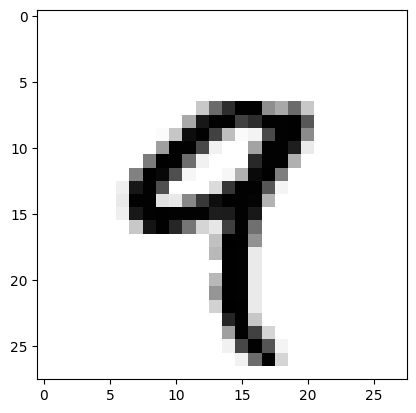

In [5]:
# 데이터의 확인 
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

In [7]:
#신경망을 만드는 부분
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
#데이터를 준비하는 부분
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [10]:
# 라벨 데이터를 카테고리 데이터로 변환
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5,batch_size = 128 )

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 2.2376 - accuracy: 0.2477
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1.6819 - accuracy: 0.5901
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0497 - accuracy: 0.7482
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.7509 - accuracy: 0.8124
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6062 - accuracy: 0.8410


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 3s 7ms/step - loss: 47.0992 - accuracy: 0.7331
test acc: 0.7330999970436096


In [14]:
# IMDB

from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [15]:
train_data.shape

(25000,)

In [18]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

In [19]:
max([max(sequence) for sequence in train_data])

9999

In [26]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [48]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [49]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [50]:
# 라벨 데이터도 실수형으로 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [51]:
y_train[0]

1.0

In [52]:
# 신경망 제작
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

In [53]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [54]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5227 - accuracy: 0.7738 - val_loss: 0.4103 - val_accuracy: 0.8497
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3191 - accuracy: 0.8987 - val_loss: 0.3151 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2335 - accuracy: 0.9243 - val_loss: 0.2814 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1913 - accuracy: 0.9351 - val_loss: 0.2831 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1555 - accuracy: 0.9497 - val_loss: 0.2803 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1329 - accuracy: 0.9578 - val_loss: 0.2889 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1120 - accuracy: 0.9661 - val_loss: 0.3011 - val_accuracy: 0.8858
Epoch 8/20
30

In [55]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

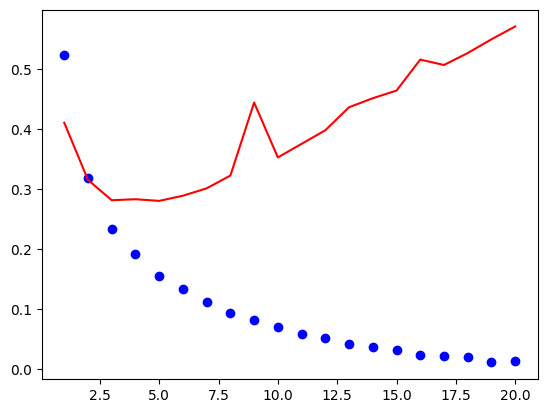

In [56]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'r-')

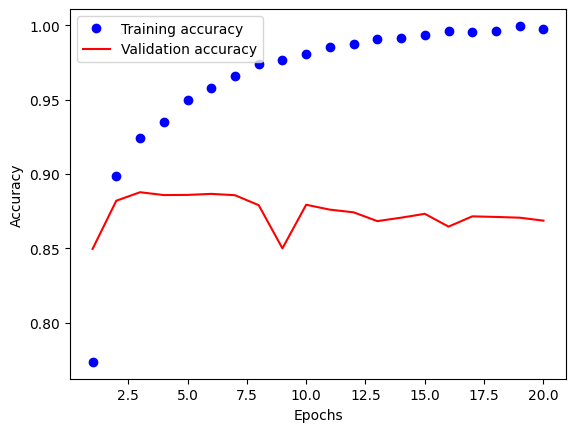

In [57]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [58]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[2.25093737e-02],
       [9.99994040e-01],
       [7.59080827e-01],
       ...,
       [5.37836459e-04],
       [1.52680315e-02],
       [9.77214158e-01]], dtype=float32)

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 2s 3ms/step - loss: 0.6109 - accuracy: 0.8584
loss=0.610938310623169, accuracy=0.8583599925041199
